In [8]:
!pip3 install --user pandas

You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [9]:
!pip3 install --user seaborn

You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
import seaborn as sns 

ModuleNotFoundError: No module named 'seaborn'

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [12]:
import sqlite3

In [23]:
con = sqlite3.connect('telecom (1).db')
tables = con.execute("SELECT name from sqlite_master WHERE type ='table'")

for name in tables:
    print(name[0])

train
event_type
severity_type
resource_type
log_feature


In [32]:
train = pd.read_sql("SELECT * from train",con)
event = pd.read_sql("SELECT * from event_type",con)
sev = pd.read_sql("SELECT * from severity_type",con)
res = pd.read_sql("SELECT * from resource_type",con)
log = pd.read_sql("SELECT * from log_feature",con)

In [38]:
df = pd.concat([train, event, sev, res, log], axis=1)
df

,index,id,location,fault_severity,index,id,event_type,index,id,severity_type,index,id,resource_type,index,id,log_feature,volume
0,0.0,14121.0,location 118,1.0,0.0,6597.0,event_type 11,0.0,6597.0,severity_type 2,0.0,6597.0,resource_type 8,0,6597,feature 68,6
1,1.0,9320.0,location 91,0.0,1.0,8011.0,event_type 15,1.0,8011.0,severity_type 2,1.0,8011.0,resource_type 8,1,8011,feature 68,7
2,2.0,14394.0,location 152,1.0,2.0,2597.0,event_type 15,2.0,2597.0,severity_type 2,2.0,2597.0,resource_type 8,2,2597,feature 68,1
3,3.0,8218.0,location 931,1.0,3.0,5022.0,event_type 15,3.0,5022.0,severity_type 1,3.0,5022.0,resource_type 8,3,5022,feature 172,2
4,4.0,14804.0,location 120,0.0,4.0,5022.0,event_type 11,4.0,6852.0,severity_type 1,4.0,6852.0,resource_type 8,4,5022,feature 56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58666,8720,feature 209,1
58667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58667,6488,feature 54,3
58668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58668,878,feature 62,1
58669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58669,4464,feature 209,1


In [73]:

res

,index,id,resource_type
0,0,6597,resource_type 8
1,1,8011,resource_type 8
2,2,2597,resource_type 8
3,3,5022,resource_type 8
4,4,6852,resource_type 8
...,...,...,...
21071,21071,3761,resource_type 8
21072,21072,8720,resource_type 8
21073,21073,6488,resource_type 8
21074,21074,878,resource_type 8


In [72]:
sev

,index,id,severity_type
0,0,6597,severity_type 2
1,1,8011,severity_type 2
2,2,2597,severity_type 2
3,3,5022,severity_type 1
4,4,6852,severity_type 1
...,...,...,...
18547,18547,3761,severity_type 1
18548,18548,8720,severity_type 1
18549,18549,6488,severity_type 2
18550,18550,878,severity_type 2


In [71]:
df=pd.merge(train, event, how='left', on='id')


,index_x,id,location,fault_severity,index_y,event_type
0,0,14121,location 118,1,4535,event_type 34
1,0,14121,location 118,1,4536,event_type 35
2,1,9320,location 91,0,28874,event_type 34
3,1,9320,location 91,0,28875,event_type 35
4,2,14394,location 152,1,6768,event_type 35
...,...,...,...,...,...,...
12463,7376,870,location 167,0,7330,event_type 35
12464,7377,18068,location 106,0,2458,event_type 20
12465,7378,14111,location 1086,2,3098,event_type 15
12466,7379,15189,location 7,0,20866,event_type 11


In [74]:
dp=pd.merge(sev,res , how='left', on='id')

In [76]:
dp2=pd.merge(dp,log, how='left', on='id')

In [85]:
total=pd.merge(dp2, df, how='left', on='id')

ValueError: The column label 'id' is not unique.

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [91]:
df=df.replace('location','',regex=True).drop('id', axis=1)
df=df.replace('event_type','',regex=True)
df=df.replace('severity_type','',regex=True)
df

,location,fault_severity,event_type,severity_type,resource_type,log_feature,volume
0,118,1.0,11,2,resource_type 8,feature 68,6
1,91,0.0,15,2,resource_type 8,feature 68,7
2,152,1.0,15,2,resource_type 8,feature 68,1
3,931,1.0,15,1,resource_type 8,feature 172,2
4,120,0.0,11,1,resource_type 8,feature 56,1
...,...,...,...,...,...,...,...
58666,NaN,NaN,NaN,NaN,NaN,feature 209,1
58667,NaN,NaN,NaN,NaN,NaN,feature 54,3
58668,NaN,NaN,NaN,NaN,NaN,feature 62,1
58669,NaN,NaN,NaN,NaN,NaN,feature 209,1


In [93]:
import pandas as pd
df=pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [99]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

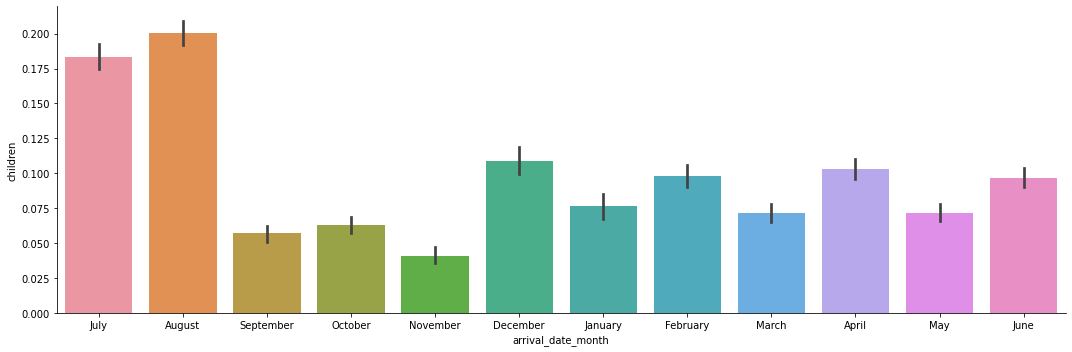

In [130]:
sns.catplot(x='arrival_date_month', y='children', data=df, kind='bar', aspect=3)

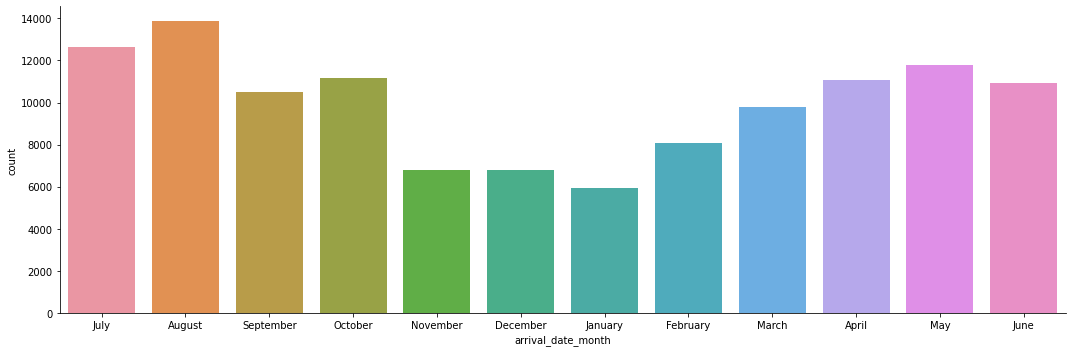

In [103]:
sns.catplot(x='arrival_date_month', data=df, kind='count', aspect= 3)

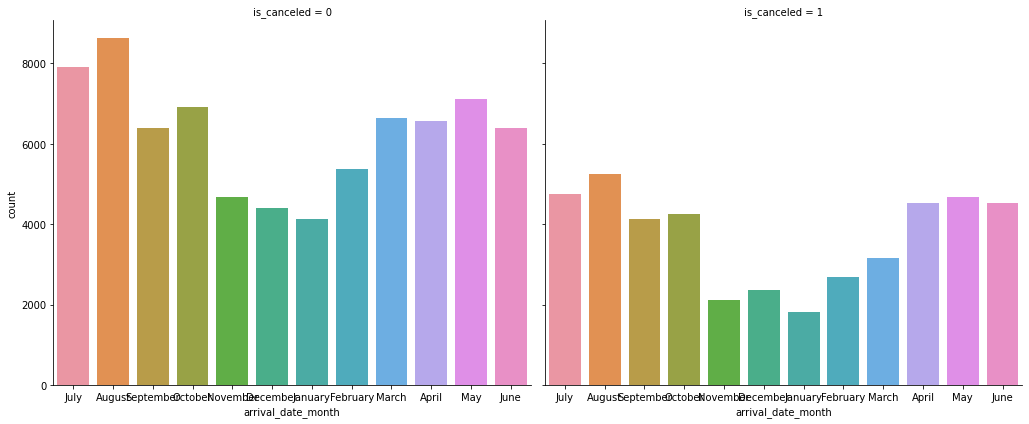

In [153]:
sns.catplot(x='arrival_date_month', data=df, col='is_canceled',kind='count', height=6, aspect=1.2)

In [134]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

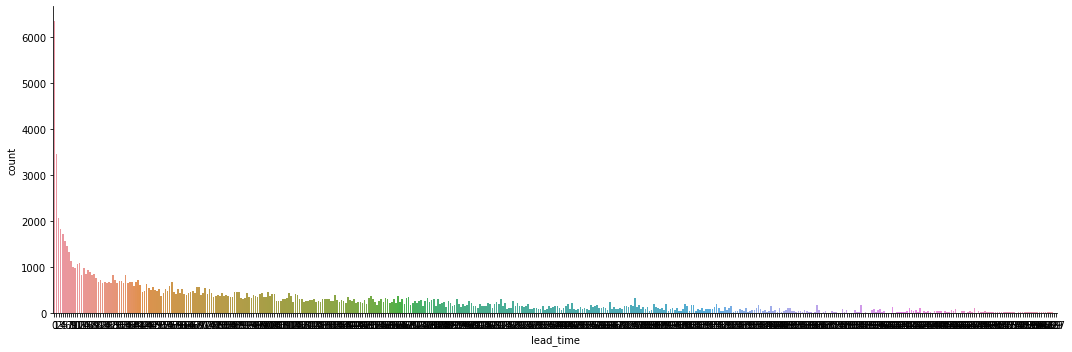

In [133]:
sns.catplot(x='is_repeated_guest', y='', data=df, kind='count', aspect=3)